In [2]:
import numpy as np
import pandas as pd
import datetime

# 时序数据分析

如果业务存在周期性变化，则需要按照这个周期进行分析，就会用到窗口函数

Pandas 提供了 移动窗口函数 rolling()、拓展窗口函数 expanding()、指数加权移动 ewm()，同时可在此基础上调用合适的统计函数

## Pandas 窗口计算

### 窗口计算

**理解窗口**

窗口就是选择部分数据进行计算

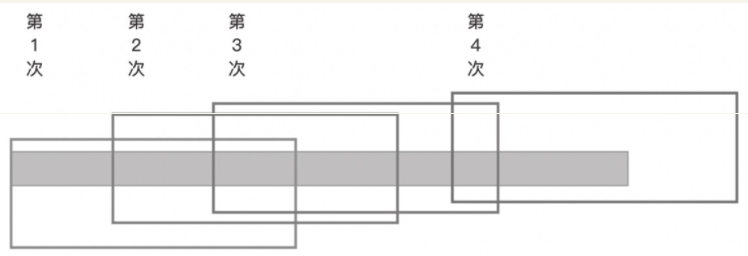

**移动窗口**

对原数据按照固定大小的窗口依次移动，直至全部覆盖数据

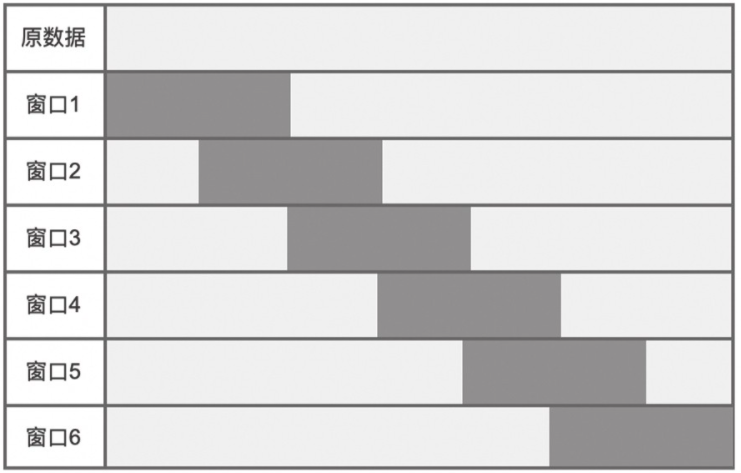

**拓展窗口**

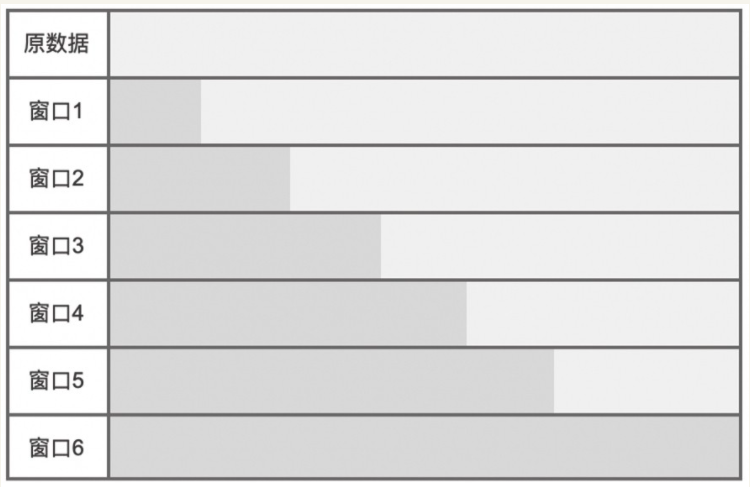

**指数加权移动**

在上述两种窗口计算中，分组中所有数值的权重都是一样的，而指数加权移动(exponential weighted moving)对分组中的数据给予不同权重，用于后续计算

### 窗口操作

```PYTHON
s.rolling(
    window: 'int | timedelta | BaseOffset | BaseIndexer',
    min_periods: 'int | None' = None,
    center: 'bool_t' = False,
    win_type: 'str | None' = None,
    on: 'str | None' = None,
    axis: 'Axis' = 0,
    closed: 'str | None' = None,
    method: 'str' = 'single',
)
•window：必传，如果使用int，可以表示窗口的大小；如果是offset类型，表示时间数据中窗口按此时间偏移量设定大小。
•min_periods：每个窗口的最小数据，小于此值窗口的输出值为NaN，offset情况下，默认为1。默认情况下此值取窗口的大小。
•win_type：窗口的类型，默认为加权平均，支持非常丰富的窗口函数，如boxcar、triang、blackman、hamming、bartlett、parzen、bohman、blackmanharris、nuttall、barthann、kaiser(beta)、gaussian(std)、general_gaussian (power, width)、slepian (width)、exponential (tau)等。具体算法可参考
 SciPy库的官方文档 https://docs.scipy.org/doc/scipy/reference/signal.windows.html

•on：可选参数，对于DataFrame要作为窗口的列。
•axis：计算的轴方向。
•closed：窗口的开闭区间定义，支持'right'、'left、'both'或'neither'。对于offset类型，默认是左开右闭，默认为right。

**窗口主要支持以下统计方法**
•count()：非空值数
•sum()：值的总和
•mean()：平均值
•median()：数值的算术中位数
•min()：最小值
•max()：最大值
•std()：贝塞尔校正的样本标准偏差
•var()：无偏方差
•skew()：样本偏斜度（三阶矩）
•kurt()：峰度样本（四阶矩）
•quantile()：样本分位数（百分位上的值）
•cov()：无偏协方差（二进制）
•corr()：关联（二进制）
```

In [3]:
s = pd.Series(range(1, 7))
s

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

In [4]:
# 移动窗口
s.rolling(2).sum()

0     NaN
1     3.0
2     5.0
3     7.0
4     9.0
5    11.0
dtype: float64

执行逻辑如下：

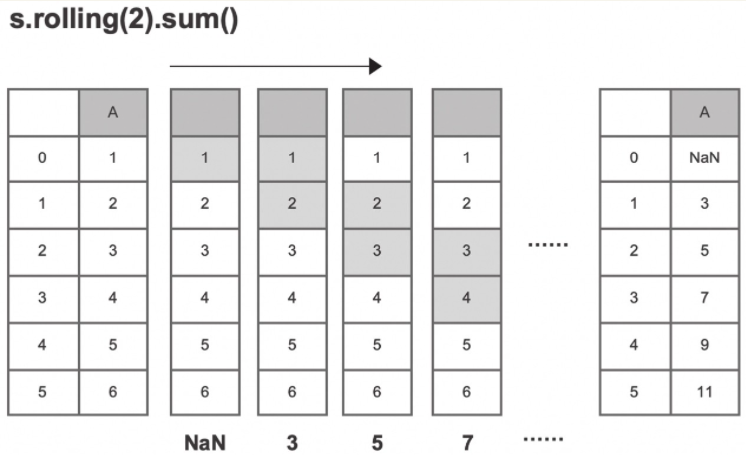

第一个窗口索引 0 只包含1个元素，无法满足窗口计算，所以结果为 NAN

最后形成了与原来数据形状一样的新数据 

### 移动窗口使用

In [3]:
# 数据
df = pd.DataFrame(np.random.randn(30, 4),
                  index=pd.date_range('10/1/2020', periods=30),
                  columns=['A', 'B', 'C', 'D'])

# 查看数据
df

,A,B,C,D
2020-10-01,-0.382507,0.424839,-1.371661,0.646678
2020-10-02,0.188328,-0.737660,0.610499,1.744208
2020-10-03,0.537033,-2.084744,0.283936,-0.263244
2020-10-04,0.214510,0.343798,1.110850,-0.218451
2020-10-05,1.655929,0.227231,1.069254,1.536089
2020-10-06,-0.519205,0.196161,-0.093373,-0.034081
2020-10-07,-1.283558,1.087263,-1.401168,0.210033
2020-10-08,1.733912,0.712192,0.308266,-2.013071
2020-10-09,1.122467,0.025394,-0.045096,0.143751
2020-10-10,-0.177883,0.680673,-1.270038,1.588626


In [4]:
# 每 2 天为一个窗口，在窗口上求平均值
df.rolling(2).mean()

,A,B,C,D
2020-10-01,NaN,NaN,NaN,NaN
2020-10-02,-0.097090,-0.156410,-0.380581,1.195443
2020-10-03,0.362680,-1.411202,0.447218,0.740482
2020-10-04,0.375772,-0.870473,0.697393,-0.240848
2020-10-05,0.935220,0.285515,1.090052,0.658819
2020-10-06,0.568362,0.211696,0.487941,0.751004
2020-10-07,-0.901382,0.641712,-0.747270,0.087976
2020-10-08,0.225177,0.899727,-0.546451,-0.901519
2020-10-09,1.428190,0.368793,0.131585,-0.934660
2020-10-10,0.472292,0.353034,-0.657567,0.866189


In [5]:
# 使用时间偏移作为周期
# 2D 代表2天，与上同，但使用时间偏移，默认最小观察数据为1，所以第一天也有数据，即自身
df.rolling('2D').mean()

,A,B,C,D
2020-10-01,-0.382507,0.424839,-1.371661,0.646678
2020-10-02,-0.097090,-0.156410,-0.380581,1.195443
2020-10-03,0.362680,-1.411202,0.447218,0.740482
2020-10-04,0.375772,-0.870473,0.697393,-0.240848
2020-10-05,0.935220,0.285515,1.090052,0.658819
2020-10-06,0.568362,0.211696,0.487941,0.751004
2020-10-07,-0.901382,0.641712,-0.747270,0.087976
2020-10-08,0.225177,0.899727,-0.546451,-0.901519
2020-10-09,1.428190,0.368793,0.131585,-0.934660
2020-10-10,0.472292,0.353034,-0.657567,0.866189


In [10]:
# 只对一列进行窗口计算
df.rolling('2D')['A'].mean()
# df.A.rolling('2D').mean() # 同上

2020-10-01   -0.382507
2020-10-02   -0.097090
2020-10-03    0.362680
2020-10-04    0.375772
2020-10-05    0.935220
2020-10-06    0.568362
2020-10-07   -0.901382
2020-10-08    0.225177
2020-10-09    1.428190
2020-10-10    0.472292
2020-10-11    0.361887
2020-10-12    0.327350
2020-10-13   -0.171431
2020-10-14   -0.038090
2020-10-15   -0.001829
2020-10-16   -0.254239
2020-10-17    0.702326
2020-10-18    1.348465
2020-10-19    0.634598
2020-10-20   -0.451570
2020-10-21   -0.837229
2020-10-22   -1.464932
2020-10-23   -1.534817
2020-10-24   -0.125314
2020-10-25   -0.042192
2020-10-26    0.076585
2020-10-27   -0.240326
2020-10-28   -0.307319
2020-10-29   -0.288802
2020-10-30   -1.187341
Freq: D, Name: A, dtype: float64

In [11]:
# 指定窗口类型
df.rolling(2,win_type='hamming').sum()

,A,B,C,D
2020-10-01,NaN,NaN,NaN,NaN
2020-10-02,-0.015534,-0.025026,-0.060893,0.191271
2020-10-03,0.058029,-0.225792,0.071555,0.118477
2020-10-04,0.060123,-0.139276,0.111583,-0.038536
2020-10-05,0.149635,0.045682,0.174408,0.105411
2020-10-06,0.090938,0.033871,0.078071,0.120161
2020-10-07,-0.144221,0.102674,-0.119563,0.014076
2020-10-08,0.036028,0.143956,-0.087432,-0.144243
2020-10-09,0.228510,0.059007,0.021054,-0.149546
2020-10-10,0.075567,0.056485,-0.105211,0.138590


In [12]:
# 不同列使用不同的统计方法
df.rolling('2D').agg({'A':sum,'B':np.std})

,A,B
2020-10-01,-0.382507,NaN
2020-10-02,-0.194179,0.822011
2020-10-03,0.725361,0.952532
2020-10-04,0.751543,1.717238
2020-10-05,1.870439,0.082425
2020-10-06,1.136724,0.021970
2020-10-07,-1.802764,0.630104
2020-10-08,0.450354,0.265215
2020-10-09,2.856379,0.485639
2020-10-10,0.944584,0.463352


In [13]:
# 同一列使用不同的统计方法
df.A.rolling('2D').agg({'A_sum':sum,'A_std':np.std})

,A_sum,A_std
2020-10-01,-0.382507,NaN
2020-10-02,-0.194179,0.403641
2020-10-03,0.725361,0.246572
2020-10-04,0.751543,0.228058
2020-10-05,1.870439,1.019237
2020-10-06,1.136724,1.538052
2020-10-07,-1.802764,0.540479
2020-10-08,0.450354,2.133674
2020-10-09,2.856379,0.432357
2020-10-10,0.944584,0.919486


In [14]:
# 自定义函数 apply（）
# 要求此函数返回一个单一值，因窗口计算后每个窗口产生也是一个唯一值
df.A.rolling('2D').apply(lambda x:abs(sum(x)+1))

2020-10-01    0.617493
2020-10-02    0.805821
2020-10-03    1.725361
2020-10-04    1.751543
2020-10-05    2.870439
2020-10-06    2.136724
2020-10-07    0.802764
2020-10-08    1.450354
2020-10-09    3.856379
2020-10-10    1.944584
2020-10-11    1.723775
2020-10-12    1.654699
2020-10-13    0.657139
2020-10-14    0.923820
2020-10-15    0.996343
2020-10-16    0.491522
2020-10-17    2.404652
2020-10-18    3.696930
2020-10-19    2.269197
2020-10-20    0.096861
2020-10-21    0.674458
2020-10-22    1.929864
2020-10-23    2.069634
2020-10-24    0.749373
2020-10-25    0.915616
2020-10-26    1.153171
2020-10-27    0.519349
2020-10-28    0.385361
2020-10-29    0.422397
2020-10-30    1.374682
Freq: D, Name: A, dtype: float64

### 拓展窗口

df.expanding() 与 df.rolling() 使用逻辑一样

In [15]:
# 原始数据
s = pd.Series(range(1, 7))
s

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

In [16]:
s.expanding(2).sum()

0     NaN
1     3.0
2     6.0
3    10.0
4    15.0
5    21.0
dtype: float64

第一个元素时，由于给定窗口的大小是2无法计算，因此结果是NAN

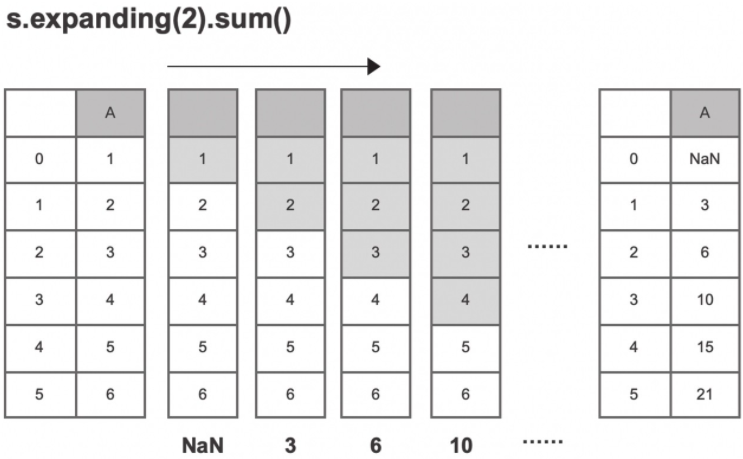

# Pandas 时序数据

时序数据，就是数据随着时间的变化而变化，比如股票的变化

Pandas在时序数据处理中的方法，主要有

    时间的概念、时间的计算机表示方法、时间的属性操作和时间格式转换；
    
    时间之间的数学计算、时长的意义、时长与时间的加减操作；
    
    时间偏移的概念、用途、表示方法；
    
    时间跨度的意义、表示方法、单位转换等

## 固定时间

时间的进制比较复杂
    
    分钟到小时是60进制
    
    小时与天是24进制
    
    天与星期是7进制
    
    天与月又28-31进制不等
    
    月与年是12进制

### 时间的表示

固定时间是一个时间点，如 2022年2月11日00：00：00

固定时间含有丰富的信息，如年、周几、几月、那个季度，需要我们进行抽取

在计算机中，时间多用时间戳（Timestamp）表示。时间戳是指 1970年1月1日00：00：00秒其至当下的总秒数。如如1591684854代表北京时间2020/6/9 14:40:54。那么1970年以前的时间怎么表示呢？用负数，如–1591684957代表1919/7/26 2:17:23。

Python官方库datetime创建时间如下，**Pandas或其他第三方库都是在datetime基础上建立时间对象的**

In [22]:
# 当前时间
datetime.datetime.now()

datetime.datetime(2022, 2, 11, 10, 36, 10, 285998)

In [26]:
# 指定时间
datetime.datetime(2020,11,1,19)
# datetime.datetime(year=2020,month=11,day=11)

datetime.datetime(2020, 11, 11, 0, 0)

### 创建时间点

**使用python的datetime库**

In [2]:
# 至少包含年月日
pd.Timestamp(datetime.datetime(2020,6,8))

Timestamp('2020-06-08 00:00:00')

In [3]:
pd.Timestamp(datetime.datetime(2020,6,8,16,17,18))

Timestamp('2020-06-08 16:17:18')

**使用时间字符串**

In [6]:
pd.Timestamp('2022-2-14')
# pd.Timestamp('2022-02-14')

Timestamp('2022-02-14 00:00:00')

In [7]:
pd.Timestamp('2022-2-14T12')

Timestamp('2022-02-14 12:00:00')

**指定时间位置数字**

类似datetime，可依次指定year、month、day、hour、minute、second、miscrosecond

In [8]:
pd.Timestamp(2015,5,1)

Timestamp('2015-05-01 00:00:00')

In [9]:
pd.Timestamp(2015,5,1,12)

Timestamp('2015-05-01 12:00:00')

In [10]:
pd.Timestamp(year=2022,month=2,day=14,hour=12,minute=43,second=11,microsecond=20)

Timestamp('2022-02-14 12:43:11.000020')

**解析时间戳**

In [3]:
# unit：[ 'D'天, 'h'小时, 'm'分, 's'秒, 'ms'毫秒, 'us'微秒, and 'ns'纳秒.]
# tz 指定时区，北京时间：Asia/Shanghai
pd.Timestamp(1513393355.5,unit='s',tz='US/Pacific')

Timestamp('2017-12-15 19:02:35.500000-0800', tz='US/Pacific')

In [4]:
pd.Timestamp(1513393355.5,unit='s',tz='Asia/Shanghai')

Timestamp('2017-12-16 11:02:35.500000+0800', tz='Asia/Shanghai')

**获取当前时间**

In [5]:
pd.Timestamp('today')
# pd.Timestamp('now')#同上

Timestamp('2022-02-14 17:56:22.989660')

In [8]:
pd.Timestamp('today').date()#只取日期

datetime.date(2022, 2, 14)

**通过当前时间计算出昨天、明天**

In [5]:
#昨天
#注意参数是days
pd.Timestamp('now')-pd.Timedelta(days=1)

Timestamp('2022-02-14 10:00:05.534094')

In [6]:
# 明天
pd.Timestamp('now')+pd.Timedelta(days=1)

Timestamp('2022-02-16 14:27:25.926829')

In [7]:
#当月1号
pd.Timestamp('now').replace(day=1)

Timestamp('2022-02-01 14:28:08.949310')

### **时间转换**

In [12]:
pd.to_datetime('2012-1-1')
# pd.to_datetime('2012/1/1')
# pd.to_datetime('2012.1.1')
# pd.to_datetime('2012 1 1')

Timestamp('2012-01-01 00:00:00')

**Pandas时间限制**

由于Pandas以纳秒粒度表示时间戳，因此64位整数表示的时间跨度大约584年，意味着时间有最早、最晚的限制

不过 Pandas 也给出了解决方案，可以用 PeriodIndex 解决

In [13]:
pd.Timestamp.min

Timestamp('1677-09-21 00:12:43.145224193')

In [14]:
pd.Timestamp.max

Timestamp('2262-04-11 23:47:16.854775807')

### 时间的属性

一个时间包含丰富的属性，如年份、月份、周几等

In [ ]:
time.asm8 # 返回NumPy datetime64格式（以纳秒为单位）
# numpy.datetime64('2020-06-09T16:30:54.813664000')
time.dayofweek # 1（周几，周一为0）
time.dayofyear # 161（一年的第几天）
time.days_in_month # 30（当月有多少天）
time.daysinmonth # 30（同上）
time.freqstr # None（周期字符）
time.is_leap_year # True（是否闰年，公历的）
time.is_month_end # False（是否当月最后一天）
time.is_month_start # False（是否当月第一天）
time.is_quarter_end # False（是否当季最后一天）
time.is_quarter_start # False（是否当季第一天）
time.is_year_end # 是否当年最后一天
time.is_year_start # 是否当年第一天
time.quarter # 2（当前季度数）
# 如指定，会返回类似<DstTzInfo 'Asia/Shanghai' CST+8:00:00 STD>
time.tz # None（当前时区别名）
time.week # 24（当年第几周）
time.weekofyear # 24（同上）
time.day # 9（日）
time.fold # 0
time.freq # None（频度周期）
time.hour # 16
time.microsecond # 890462
time.minute # 46
time.month # 6
time.nanosecond # 0
time.second # 59
time.tzinfo # None
time.value # 1591721219890462000
time.year # 2020

### 时间的方法

In [34]:
time=pd.Timestamp('now',tz='Asia/Shanghai')
time

Timestamp('2022-02-15 14:48:23.726235+0800', tz='Asia/Shanghai')

In [20]:
# 转换时区
time.astimezone('UTC')
# time.tz_convert('UTC')

Timestamp('2022-02-15 06:41:37.218555+0000', tz='UTC')

In [36]:
# 转换为周期类型，将丢失时区
time.to_period(freq='h')

C:\Users\26598\AppData\Local\Temp/ipykernel_22092/1277431429.py:1: UserWarning: Converting to Period representation will drop timezone information.
  time.to_period(freq='h')


Period('2022-02-15 14:00', 'H')

In [24]:
# 转换单位，向上舍入
time.ceil('s')
# time.ceil('ns')
# time.ceil('d')
# time.ceil('h')

# 向下舍入
# time.floor('h')

# 类似四舍五入
# time.round('h')

Timestamp('2022-02-15 14:00:00+0800', tz='Asia/Shanghai')

In [25]:
# 返回星期几
time.day_name()

'Tuesday'

In [26]:
# 返回月份
time.month_name()

'February'

In [27]:
# 时间规范为午夜
time.normalize()

Timestamp('2022-02-15 00:00:00+0800', tz='Asia/Shanghai')

In [30]:
# 替换时间
time.replace(year=2019)
# time.replace(month=12)

Timestamp('2022-12-15 14:41:37.218555+0800', tz='Asia/Shanghai')

In [40]:
time=pd.Timestamp('now')
time

Timestamp('2022-02-15 14:50:34.172980')

In [42]:
# 本地化时区转换 添加时区
time.tz_localize(tz='Asia/Shanghai')

Timestamp('2022-02-15 14:50:34.172980+0800', tz='Asia/Shanghai')

In [43]:
# 删除时区
time.tz_localize(None)

Timestamp('2022-02-15 14:50:34.172980')

### 时间缺失值

时间缺失值有专门的NaT表示

In [45]:
pd.Timestamp(pd.NaT)
# NaT

pd.Timedelta(pd.NaT)
# NaT

pd.Period(pd.NaT)
# NaT

# 类似np.nan
pd.NaT == pd.NaT
# False

False

In [46]:
pd.NaT + pd.Timestamp('20201001')
# NaT

pd.NaT + pd.Timedelta('2 days')
# NaT

pd.Timedelta('2 days') - pd.NaT
# NaT

NaT

## 时长数据

两个固定时间相减会得到时间差，即时长

pd.Timedelta 对象表示时长数据，可正可负

时长数据没有开始、结束的时间，是一个绝对的时间数值，使用场景较少，但是我们后续理解时间偏移和周期时间的基础

### 时长数据的创建

In [47]:
# 固定时间相减
pd.Timestamp('2022-2-15 10:00:00')-pd.Timestamp('2022-2-14 9:59:59')

Timedelta('1 days 00:00:01')

In [49]:
# 负数
pd.Timestamp('2022-2-14 9:59:59')-pd.Timestamp('2022-2-15 10:00:00')

Timedelta('-2 days +23:59:59')

时间字符串

    * 'W'周, 'D'天, 'T'分, 'S'秒, 'L'毫秒, 'U'微秒, or 'N'纳秒
    * 'days' or 'day'
    * 'hours', 'hour', 'hr', or 'h'
    * 'minutes', 'minute', 'min', or 'm'
    * 'seconds', 'second', or 'sec'
    * 'milliseconds', 'millisecond', 'millis', or 'milli'
    * 'microseconds', 'microsecond', 'micros', or 'micro'
    * 'nanoseconds', 'nanosecond', 'nanos', 'nano', or 'ns'.

In [68]:
# 时间字符串
pd.Timedelta('1d 2h 3m 5s')
# pd.Timedelta('1d2h3m5s')#也可以不分开，分开是为了可读性

Timedelta('1 days 02:03:05')

In [73]:
# 关键字参数
# allowed keywords are [weeks, days, hours, minutes, seconds, milliseconds, microseconds, nanoseconds]
pd.Timedelta(weeks=1,days=1,hours=1,minutes=1,seconds=1)

Timedelta('8 days 01:01:01')

In [77]:
# 带单位
pd.Timedelta(1,unit='s')

Timedelta('0 days 00:00:01')

In [79]:
# 缺失值
pd.Timedelta('nan')
pd.Timedelta('nat')

NaT

In [80]:
# 标准 ISO 8601 Duration strings
pd.Timedelta('P0DT0H0M0.00123S')

Timedelta('0 days 00:00:00.001230')

时间偏移对象 DateOffsets(Day,Hour,Minute,Second,Milli,Micro,Nano)

In [81]:
# 使用时间偏移对象
pd.Timedelta(pd.offsets.Minute(2))

Timedelta('0 days 00:02:00')

### 时长数据转换

In [89]:
pd.to_timedelta('1d 2h 3m 5s')#时间字符串
pd.to_timedelta(pd.offsets.Minute(2))#时间偏移对象
pd.to_timedelta('nan')
pd.to_timedelta('nat')

NaT

### 时长数据也有上下限

如果想处理更大的类型，可以转换为数字类型

In [82]:
pd.Timedelta.max

Timedelta('106751 days 23:47:16.854775807')

In [83]:
pd.Timedelta.min

Timedelta('-106752 days +00:12:43.145224193')

### 时长数据的加减

In [91]:
pd.Timedelta('1d')+pd.Timedelta('2h')

Timedelta('1 days 02:00:00')

In [92]:
pd.Timedelta('1d')-pd.Timedelta('2h')

Timedelta('0 days 22:00:00')

固定时间与时长数据加减会得到新的固定时间，不过我们一般通过时间偏移操作

In [94]:
pd.Timestamp('2020-11-11')+pd.Timedelta('2d')

Timestamp('2020-11-13 00:00:00')

### 时长的属性

可以从时长数据提取小时、秒等

In [96]:
tdt=pd.Timedelta('10d 9m 3s')
tdt

Timedelta('10 days 00:09:03')

In [97]:
tdt.days

10

In [98]:
tdt.seconds

543

In [99]:
tdt.value#时间戳

864543000000000

### 时长索引

时长数据可以作为索引(TimedeltaIndex),他使用场景较少，例如在体育运动中，分别有2分钟、4分钟、5分钟完成。

这种情况下时长数据作为索引，完成的人数、评分身高作为列名

## 时间序列

众多固定时间（时间点）的排列就是时间序列

### 时间索引

在处理时间过程中，时间经常作为索引

Datatimeindex 是时间索引对象，由 to_datetime() 或 date_range() 创建

In [4]:
pd.to_datetime(['28/2/2022',#类时间字符串
                np.datetime64('2022-02-28'),#numpy事件类型
                datetime.datetime(2022,2,28)#python自带时间类型
    
])

DatetimeIndex(['2022-02-28', '2022-02-28', '2022-02-28'], dtype='datetime64[ns]', freq=None)

#### pd.date_range

[pandas.date_range](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html)用于生成固定频率的DatetimeIndex对象

参数 frep 取值说明：[frep](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases)
```
常用偏移量
别名	偏移量类型	说明
D	Day	每日历日
B	 BusinessDay	每工作日 
H	 Hour	每小时 
T或min	 Minute	每分 
M	 MonthEnd	每月最后一个日历日 
BM	 BusinessMonthEnd	 每月最后一个工作日
WOM-1MON 	 WeekOfMonth	 产生每月第一、第二、第四周的星期几，如WOM-3FRI表示每月第3个周五
Q-JAN 	 QuarterEnd	 对于指定月份（JAN、FEB、MAR...DEC）结束的年度，每季度最后一个月的最后一个日历日
A-JAN 	 YearEnd	 对于指定年份的最后一个日历日
```
```python
pd.date_range(
    start=None,#开始时间
    end=None,#结束时间
    periods=None,#时间序列数量
    freq=None,#freq 时间序列间隔 默认为 D（天）
    tz=None,
    normalize: 'bool' = False,
    name: 'Hashable' = None,
    closed=None,
    **kwargs,
) -> 'DatetimeIndex'
```

函数调用至少包含 start end periods 中的两个

In [8]:
pd.date_range('2022-3-1','2022-3-10')
pd.date_range('2022-3-1',periods=10)
pd.date_range(periods=10,end='2022-3-1')

DatetimeIndex(['2022-02-20', '2022-02-21', '2022-02-22', '2022-02-23',
               '2022-02-24', '2022-02-25', '2022-02-26', '2022-02-27',
               '2022-02-28', '2022-03-01'],
              dtype='datetime64[ns]', freq='D')

In [10]:
pd.date_range('2022-3-1','2022-3-10',freq='2D')

DatetimeIndex(['2022-03-01', '2022-03-03', '2022-03-05', '2022-03-07',
               '2022-03-09'],
              dtype='datetime64[ns]', freq='2D')

#### pd.bdate_range

[pd.bdate_range](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.bdate_range.html)用于生成固定频率的DatetimeIndex对象，可以跳过周六日

用法与pd.date_range相同
```python
pd.bdate_range(
    start=None,
    end=None,
    periods: 'int | None' = None,
    freq='B',
    tz=None,
    normalize: 'bool' = True,
    name: 'Hashable' = None,
    weekmask=None,
    holidays=None,
    closed=None,
    **kwargs,
) -> 'DatetimeIndex'
```
函数调用至少包含 start end periods 中的两个

In [11]:
pd.bdate_range('2022-3-1','2022-3-13')

DatetimeIndex(['2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04',
               '2022-03-07', '2022-03-08', '2022-03-09', '2022-03-10',
               '2022-03-11'],
              dtype='datetime64[ns]', freq='B')

#### 数据访问

## 时间偏移

## 时间段

## 时间操作